# Decision Tree

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pybaseball import statcast
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import log_loss
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (brier_score_loss, precision_score, recall_score)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
stat_df = statcast(start_dt="2022-04-07", end_dt="2022-10-02")

This is a large query, it may take a moment to complete


 59%|███████████████████████████████████████████████▎                                | 106/179 [00:45<01:51,  1.53s/it]C:\Users\AGaev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
C:\Users\AGaev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date

In [3]:
#Exit Velocity and Launch Angle
bip_df = stat_df[(pd.notnull(stat_df["bb_type"]))]
bip_df = bip_df.dropna(how="any", subset=["launch_speed", "launch_angle"])
list(set(bip_df["description"]))

['hit_into_play']

In [4]:
bip_df["ev_round"] = [round(ev) for ev in bip_df["launch_speed"]]
bip_df["la_round"] = [round(la) for la in bip_df["launch_angle"]]

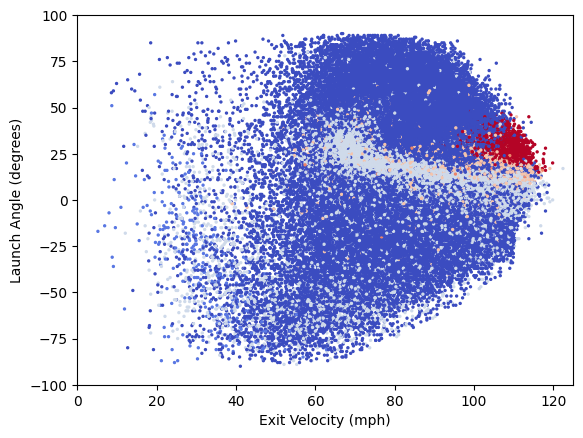

In [5]:
#Plot of the Data with wOBA values on a coolwarm color scale
fig, ax = plt.subplots()
plt.scatter(x=bip_df["launch_speed"], y=bip_df["launch_angle"], c=bip_df["woba_value"], s=2, cmap="coolwarm")
ax.set_xlim(0,125)
ax.set_ylim(-100,100)
ax.set_xlabel("Exit Velocity (mph)")
ax.set_ylabel("Launch Angle (degrees)")
plt.show()

In [6]:
bip_df.isnull().values.any()

# Identify rows with NaN values
rows_with_nan = bip_df[bip_df.isnull().any(axis=1)]
 
#View the rows with NaN values
print(rows_with_nan)

#New Data table that includes Launch Speed, Launch Angle, and Events
#Make sure to add the columns needed for the primary key to the below code
ev_la_df = bip_df[["launch_speed", "launch_angle", "events",]]

ev_la_df

     pitch_type  game_date  release_speed  release_pos_x  release_pos_z  \
3447         CU 2022-10-02           78.4           1.95           5.71   
4182         CH 2022-10-02           78.8           1.86            5.8   
2415         FF 2022-10-02           96.9          -2.12           5.78   
3781         FF 2022-10-02           98.5          -2.23           5.78   
1360         SI 2022-10-02           92.9           1.98           5.41   
...         ...        ...            ...            ...            ...   
1463         SI 2022-04-07           92.9           0.96           5.98   
2029         SI 2022-04-07           94.2           0.84           6.14   
1008         FF 2022-04-07           98.0           -2.0           5.95   
1350         FF 2022-04-07           97.7          -1.83           5.94   
1700         FF 2022-04-07           99.0          -2.01            5.9   

          player_name  batter  pitcher                     events  \
3447   Zastryzny, Rob  608369 

,launch_speed,launch_angle,events
3447,54.2,37,field_out
4182,95.1,25,field_out
2415,100.5,0,grounded_into_double_play
3781,88.6,39,field_out
1360,97.1,4,single
...,...,...,...
1463,80.2,-26,grounded_into_double_play
2029,88.7,-53,field_out
1008,81.5,64,field_out
1350,80.7,-34,force_out


In [10]:
#Categorize the events: Out, Single, Double, Triple, and Homerun
ev_la_df = ev_la_df[ev_la_df["events"].isin(["field_out", "single", "double", "triple", "home_run"])]
ev_la_df["events_encoded"] = [0 if x == "field_out" 
                                  else 1 if x == "single" 
                                  else 2 if x == "double" 
                                  else 3 if x == "triple" 
                                  else 4 if x == "home_run" 
                                  else 5 for x in ev_la_df["events"]]


# Split the data into features (X) and target (y)
X = ev_la_df.drop("events_encoded", axis=1)
Y = ev_la_df["events_encoded"]

# Split the data into training and test sets: 75% of the data is for training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.75)

In [11]:
#Scale the data
scaler= StandardScaler()
features = ["launch_speed", "launch_angle"]
X_train = scaler.fit_transform(X_train[features])
X_test = scaler.transform(X_test[features])

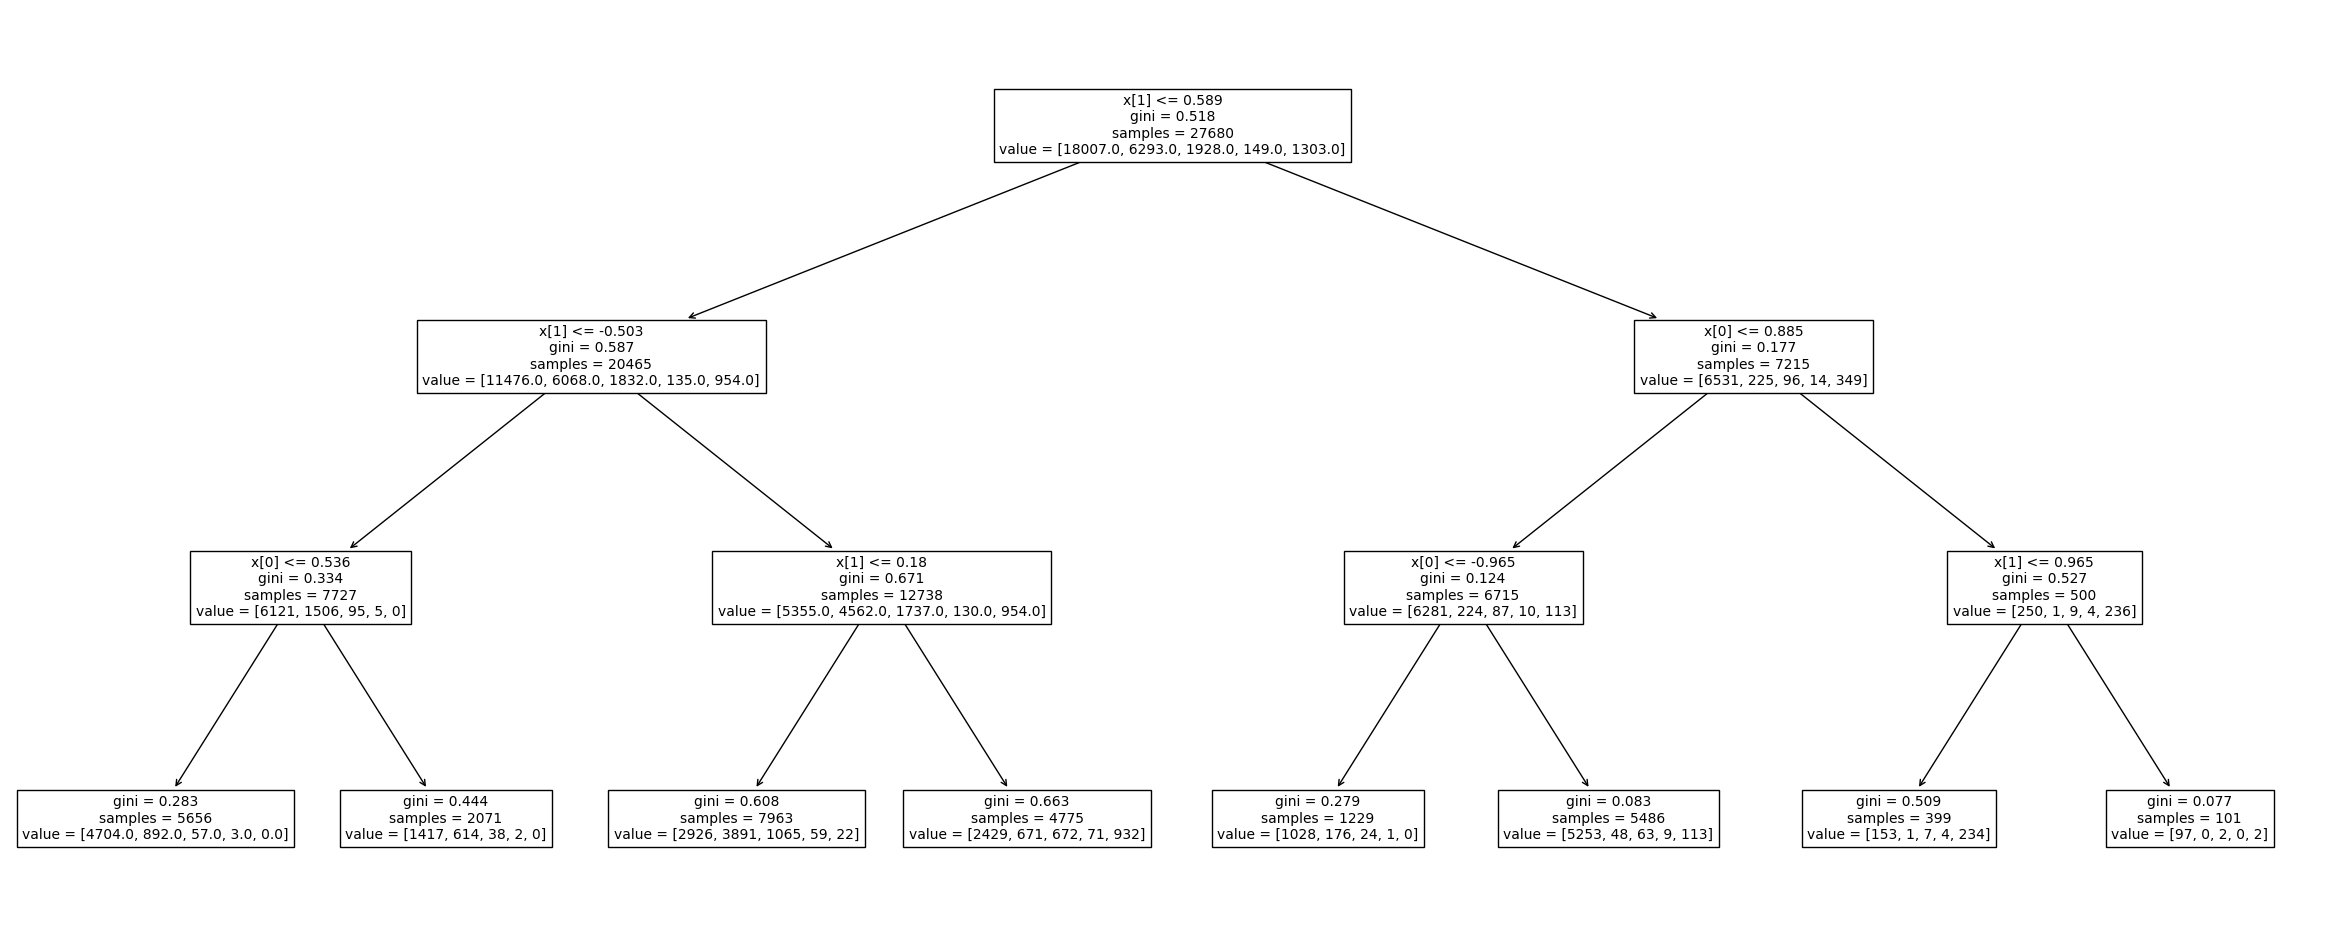

In [12]:
#Fit model
# index of 0 is launch_speed and 1 is launch_angle
decision_tree = DecisionTreeClassifier(min_samples_leaf=100, max_depth=3)
decision_tree.fit(X_train, Y_train)

#Show Tree
plt.figure(figsize = (30,12))
tree.plot_tree(decision_tree, fontsize = 10)
plt.show()

In [13]:
test_df = pd.DataFrame({"launch_speed": [1], "launch_angle": [0.7]})
test_df

,launch_speed,launch_angle
0,1,0.7


In [14]:
decision_tree.predict_proba(test_df)

C:\Users\AGaev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([[0.38345865, 0.00250627, 0.01754386, 0.01002506, 0.58646617]])

In [15]:
original_point = scaler.inverse_transform(test_df)
original_point

array([[102.92230856,  34.74541388]])

In [16]:
test_df = pd.DataFrame({"launch_speed": [130], "launch_angle": [30]})
test_df

,launch_speed,launch_angle
0,130,30


In [17]:
scaled_point = scaler.transform(test_df)
scaled_point

array([[2.85590711, 0.53800774]])

In [18]:
decision_tree.predict_proba(scaled_point)

array([[0.5086911 , 0.14052356, 0.14073298, 0.01486911, 0.19518325]])

In [ ]:
#100 mph is about .79 standard deviations vs average. 20 degrees is about .19 standard deviations vs average. 

In [19]:
preds_test = decision_tree.predict_proba(X_test)
preds_test

array([[3.67449454e-01, 4.88634937e-01, 1.33743564e-01, 7.40926786e-03,
        2.76277785e-03],
       [8.31683168e-01, 1.57708628e-01, 1.00777935e-02, 5.30410184e-04,
        0.00000000e+00],
       [9.60396040e-01, 0.00000000e+00, 1.98019802e-02, 0.00000000e+00,
        1.98019802e-02],
       ...,
       [6.84210526e-01, 2.96475133e-01, 1.83486239e-02, 9.65717045e-04,
        0.00000000e+00],
       [9.60396040e-01, 0.00000000e+00, 1.98019802e-02, 0.00000000e+00,
        1.98019802e-02],
       [5.08691099e-01, 1.40523560e-01, 1.40732984e-01, 1.48691099e-02,
        1.95183246e-01]])

In [20]:
#Calibration Curve for Each Event
def plot_calibration_curve(y_test, target_class, preds):
    """ This function ingests a target variable
    and predicted probabilities to generate
    a calibration cure

    @param y_test: This list contains the multiclass target
      for our hit type model
    @param target_class: Integer corresponding to one target
       in the y_test list
    @param preds: Numpy array of predicted probabilities for
       each target class in y_test
    
    Returns:
    
       -fig: Matplotlib object calibration curve
    """
    #Convert multiclass target to binary based on target class
    binary_target = [1 if y==target_class else 0 for y in y_test]
    
    # Initialize visualizaton
    fig = plt.figure(1, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)

    fraction_of_positives, mean_predicted_value = \
    calibration_curve(binary_target, preds [:,target_class], n_bins=10)
    ax1.plot(mean_predicted_value, fraction_of_positives, "s-")
    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

    plt.close ()
    
    return fig

In [21]:
fig_list = []
for target in range(0,5):
    fig = plot_calibration_curve(y_test = Y_test,target_class = target,preds = preds_test)
    fig_list.append(fig)

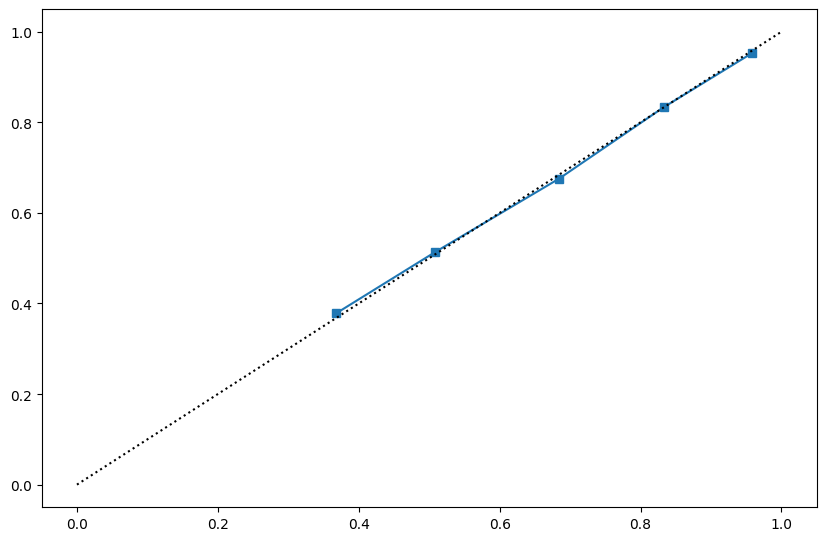

In [22]:
fig_list[0]

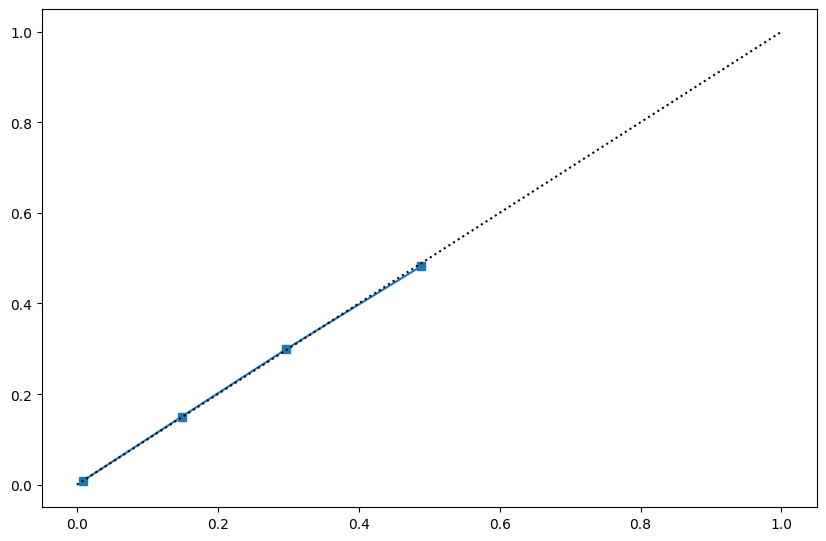

In [23]:
fig_list[1]

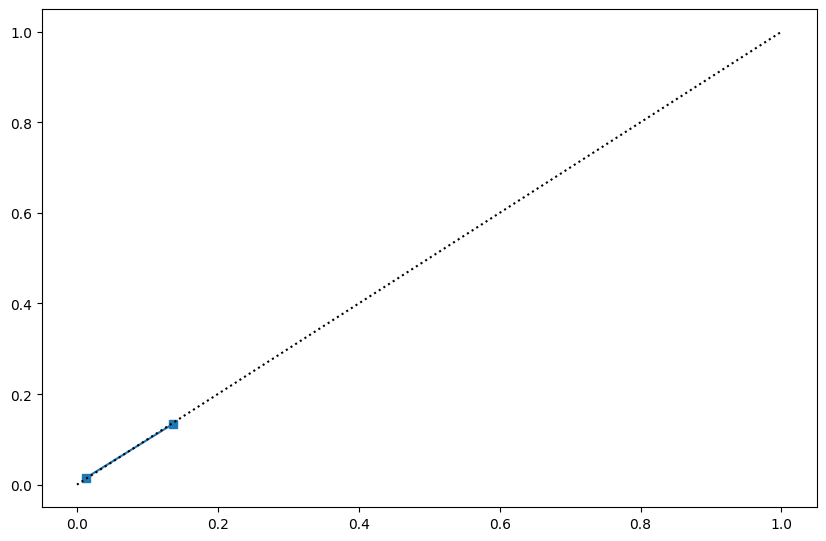

In [24]:
fig_list[2]

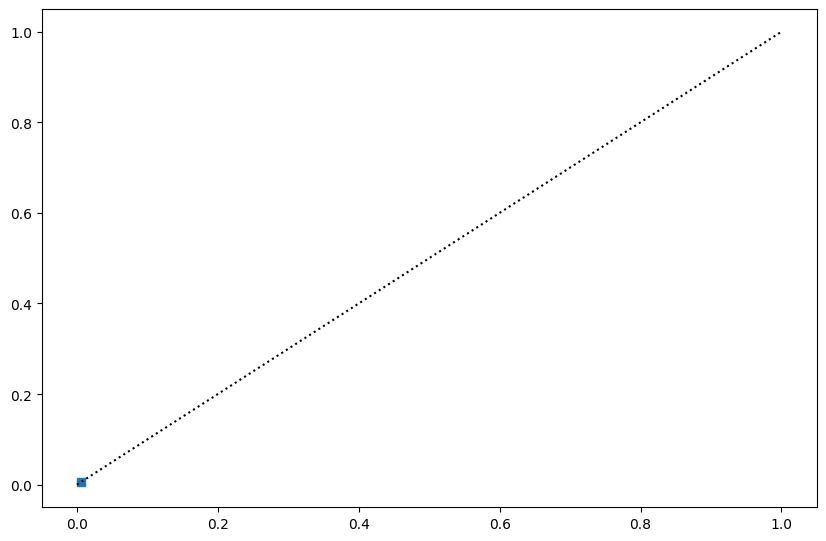

In [25]:
fig_list[3]

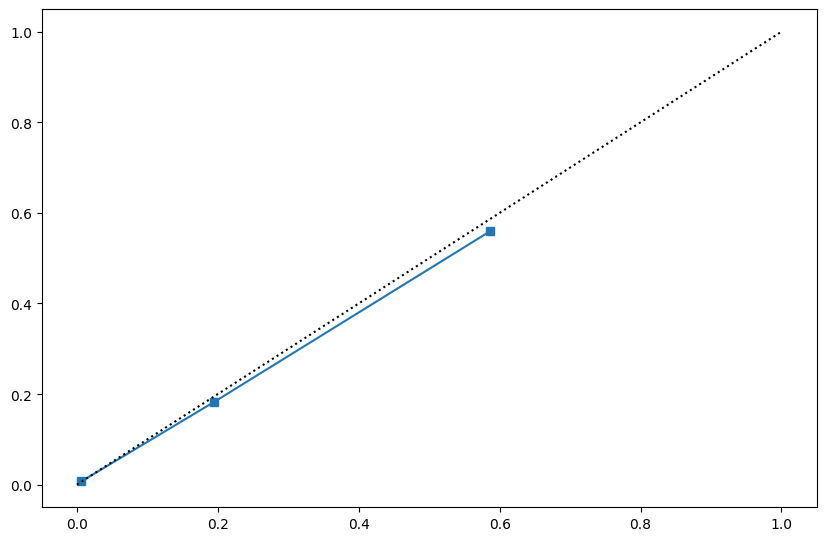

In [26]:
fig_list[4]